<class 'pandas.core.frame.DataFrame'>
Index: 2674 entries, 2 to 3158
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Регион                   2674 non-null   object 
 1   Год                      2674 non-null   int64  
 2   Младенческая_смертность  2674 non-null   float64
 3   region_standard          2674 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 104.5+ KB
None

Пропуски по колонкам:
 Регион                     0
Год                        0
Младенческая_смертность    0
region_standard            0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 32

Статистика по младенческой смертности:
 count    2674.000000
mean       71.996634
std        81.701644
min         0.000000
25%        23.000000
50%        48.000000
75%        89.000000
max       684.000000
Name: Младенческая_смертность, dtype: float64

Топ-5 региональных записей по смертности:
           

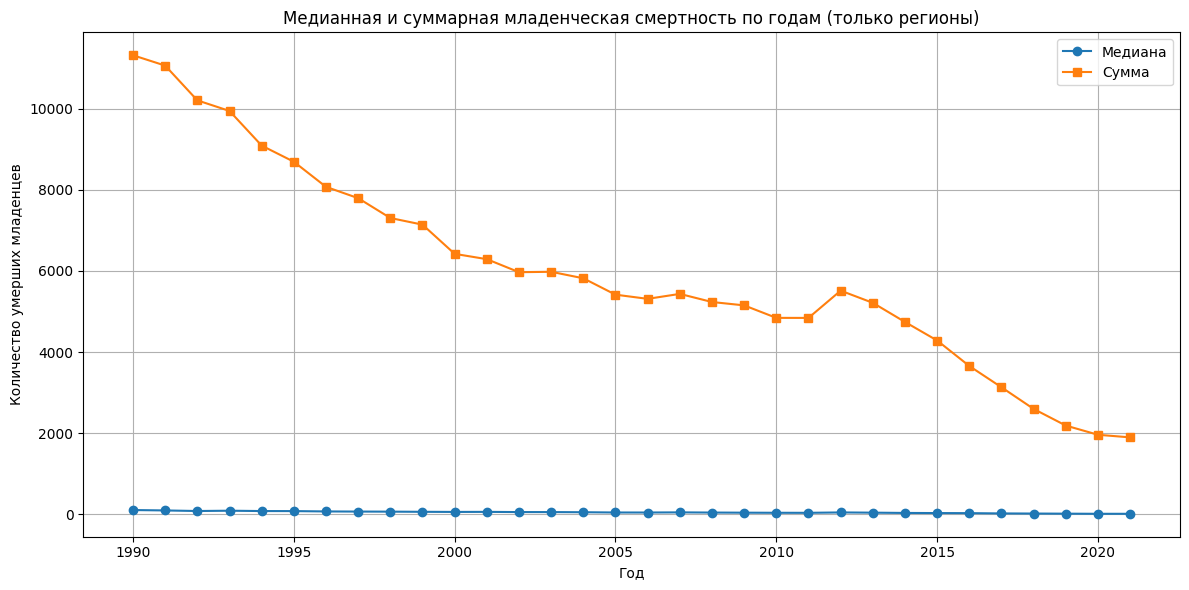

<Figure size 1600x600 with 0 Axes>

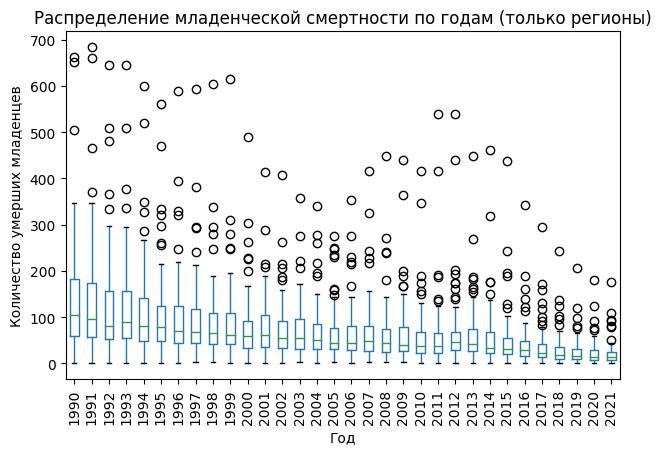

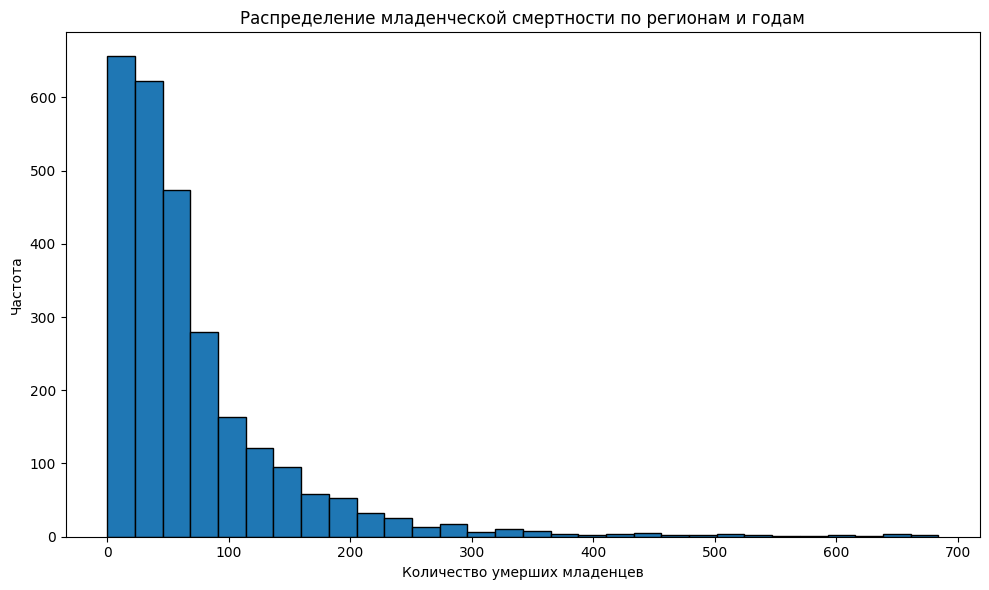

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/child_mortality_rural_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка пропусков и типов
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные регионы и годы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["Год"].nunique())

# 5. Статистика
print("\nСтатистика по младенческой смертности:\n", df["Младенческая_смертность"].describe())

# 6. Топ-5 регионов по максимальным значениям
top5 = df.sort_values(by="Младенческая_смертность", ascending=False).head(5)
print("\nТоп-5 региональных записей по смертности:\n", top5[["region_standard", "Год", "Младенческая_смертность"]])

# 7. Тренды медианы и суммы по годам
median_mortality = df.groupby("Год")["Младенческая_смертность"].median()
sum_mortality = df.groupby("Год")["Младенческая_смертность"].sum()

plt.figure(figsize=(12,6))
plt.plot(median_mortality.index, median_mortality.values, marker="o", label="Медиана")
plt.plot(sum_mortality.index, sum_mortality.values, marker="s", label="Сумма")
plt.title("Медианная и суммарная младенческая смертность по годам (только регионы)")
plt.xlabel("Год")
plt.ylabel("Количество умерших младенцев")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Boxplot по годам
plt.figure(figsize=(16,6))
df.boxplot(column="Младенческая_смертность", by="Год", grid=False, rot=90)
plt.title("Распределение младенческой смертности по годам (только регионы)")
plt.suptitle("")
plt.ylabel("Количество умерших младенцев")
plt.tight_layout()
plt.show()

# 9. Гистограмма распределения
plt.figure(figsize=(10,6))
plt.hist(df["Младенческая_смертность"], bins=30, edgecolor="black")
plt.title("Распределение младенческой смертности по регионам и годам")
plt.xlabel("Количество умерших младенцев")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `child_mortality_rural_standardized.csv`

**Описание данных**
- 2,674 записи по 85 регионам.
- Период наблюдений: 1990–2021 годы.
- Показатель: количество умерших младенцев по региону и году.

---

**Типы данных**
- Все признаки корректны (float64, int64, object).
- Приведение типов не требуется.

---

**Пропуски**
- Агрегированные строки по РФ были удалены.
- В финальной выборке пропусков нет.

---

**Основные наблюдения**
- Среднее количество смертей по региону и году: ~72.
- Медиана: 48.
- 75% значений не превышают ~89.
- Максимум: 684 (Республика Дагестан, 1991 г.).

---

**Тренды**
- С 1990-х годов наблюдается устойчивое снижение младенческой смертности.
- Особенно заметное падение в 2000-х и последующих периодах.

---

**Визуализации**
- Boxplot без агрегатов показывает значительно более плотное распределение без экстремальных выбросов.
- График трендов демонстрирует положительную динамику — сокращение смертности.

---

**Вывод**
- Данные очищены от агрегированных строк и готовы для анализа.
- Рекомендуется при анализе трендов учитывать долгосрочные улучшения, особенно при сравнении старых и новых периодов.


In [4]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/child_rural_AfterEDA.csv", index=False)